In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np  

import matplotlib.pyplot as plt 
import os 
import cv2
import random
import pickle

In [ ]:
# Path & categorizing
DATADIR="/content/drive/My Drive/21-7 Data Set/dataset2-master/images/TRAIN" 
CATEGORIES = ["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

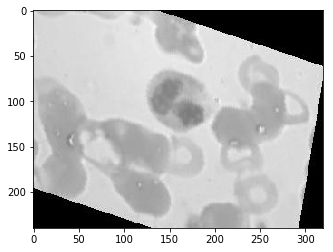

In [ ]:
#Reading All Images
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break 
    break

In [ ]:
print(img_array)

[[197 193 185 ...   0   0   0]
 [203 199 193 ...   0   0   0]
 [207 205 202 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
print(img_array.shape)

(240, 320)


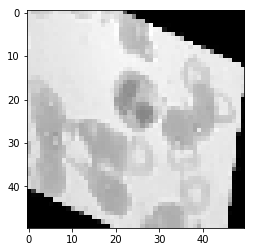

In [ ]:
IMG_SIZE=50
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exeption as e:
                pass 

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

9975


In [ ]:
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
0
2
2
1
3
3
3
3
0


In [ ]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in =open("X.pickle","rb")
X = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,MaxPooling2D

import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()

# Layeyr 1 
model.add(Conv2D(50, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))

# Layer 2
model.add(Conv2D(50, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))


#Layer 3
model.add(Conv2D(50, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))

# Layer 4 
model.add(Conv2D(50, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))

#layer 5
model.add(Flatten())
model.add(Activation("relu"))
#model.add(Dense(64))
model.add(Dense(4))
model.add(Activation("softmax"))

#model.add(Dense(4))
#model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model_output = model.fit(X,y,batch_size=64, epochs= 500,validation_split=0.1)

#model.summary()
print(model.summary())


W0721 23:32:59.589944 139880538498944 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 8977 samples, validate on 998 samples
Epoch 1/500
8977/8977 [==============================] - 112s 13ms/sample - loss: 1.3870 - acc: 0.2530 - val_loss: 1.3857 - val_acc: 0.2926
Epoch 2/500
8977/8977 [==============================] - 112s 12ms/sample - loss: 1.3795 - acc: 0.2736 - val_loss: 1.3400 - val_acc: 0.3377
Epoch 3/500
8977/8977 [==============================] - 112s 13ms/sample - loss: 1.2363 - acc: 0.4058 - val_loss: 1.1433 - val_acc: 0.4409
Epoch 4/500
8977/8977 [==============================] - 112s 13ms/sample - loss: 1.1358 - acc: 0.4562 - val_loss: 1.0801 - val_acc: 0.5010
Epoch 5/500
8977/8977 [==============================] - 111s 12ms/sample - loss: 1.0821 - acc: 0.4799 - val_loss: 1.0342 - val_acc: 0.5351
Epoch 6/500
8977/8977 [==============================] - 112s 12ms/sample - loss: 1.0626 - acc: 0.5003 - val_loss: 1.0454 - val_acc: 0.5481
Epoch 7/500
8977/8977 [==============================] - 113s 13ms/sample - loss: 1.0004 - acc: 0.5536 - val_loss